# Confirmation of DAVIS dataset
    Just to make sure DAVIS is outputing the correct data
   

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from vos.datasets.DAVIS import DAVIS_2017_TrainVal
from vos.datasets.YouTubeVOS import YouTubeVOS
from vos.datasets.video_synth import VideoSynthDataset
from vos.datasets.COCO import COCO

from vos.utils.helpers import stack_images, stack_masks

NOTE: The following two dataset, only need to run one

In [2]:
# davisroot = "/p300/videoObjSeg_dataset/DAVIS-2017-trainval-480p"
# videod = DAVIS_2017_TrainVal(davisroot, mode= "train")

cocoroot = "/p300/videoObjSeg_dataset/COCO-2017-train"
videod = VideoSynthDataset(
    COCO(cocoroot, mode= "train", max_n_objects= 8, sort_anns= True),
    n_frames= 3,
    affine_kwargs= dict(
        angle_max= 0.,
        translate_max= 0.,
        scale_max= 0.0, # NOTE: this is the exponent of e
        shear_max= 0.
    ),
    TPS_kwargs= dict(
        scale= 0.2,
        n_points= 5, # no less than 3
    ),
    dilate_scale= 5, # the number of pixels to dilate the masks
)

# youtuberoot = "/p300/videoObjSeg_dataset/YouTubeVOS2019/train"
# videod = YouTubeVOS(youtuberoot)

loading annotations into memory...
Done (t=38.67s)
creating index...
index created!


In [3]:
d_len = len(videod)
print("len: ", d_len)
data = videod[np.random.choice(d_len, 1)[0]]
for k, v in data.items():
    print(k, ": ", v.shape)

len:  118287
mask :  torch.Size([3, 9, 384, 384])
n_objects :  torch.Size([])
video :  torch.Size([3, 3, 384, 384])


tensor(8) (1, 1, 1152, 3456)


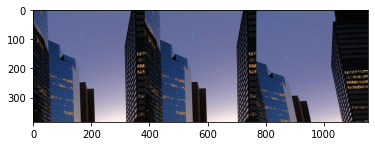

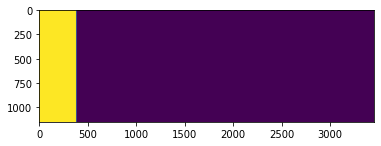

In [4]:
s_images = stack_images(np.expand_dims(data["video"][:5].numpy(), axis=0))
s_mask = stack_masks(np.expand_dims(data["mask"][:5].numpy(), axis=0)[0])
no = data["n_objects"]
print(no, s_mask.shape)

plt.imshow(s_images[0].transpose(1,2,0))
plt.figure()
plt.imshow(s_mask[0,0]*255)

## Conclusion
    - DAVIS dataset outputs proper masks whose valid information are at (0:n_objects+1) channel
    - Vieo Synthesize Dataset wrapper has issue, need further investigation
    
## The following code only use videod object from previous codes.

In [5]:
import torch
d_len = len(videod)
vdata = videod[np.random.choice(d_len, 1)[0]]
for k, v in vdata.items():
    print(k, ": ", v.shape)

mask :  torch.Size([3, 9, 384, 384])
n_objects :  torch.Size([])
video :  torch.Size([3, 3, 384, 384])


In [6]:
# Then reproducing the video synthesize dataset getitem procedure
i_len = len(videod.dataset)
idata = videod.dataset[np.random.choice(i_len, 1)[0]]
image = idata["image"]
m_image = idata["mask"]
print("n_objects: {}\n".format(idata["n_objects"]))

with torch.no_grad():
    video, m_video = videod.synth_videos([image], [m_image])
video, m_video = video[0], m_video[0]
print("image shape: {}".format(image.shape))
print("m_image shape: {}".format(m_image.shape))
print("video shape: {}".format(video.shape)) # (T, C, H, W)
print("m_video shape: {}".format(m_video.shape))

n_objects: 8

image shape: torch.Size([3, 480, 640])
m_image shape: torch.Size([9, 480, 640])
video shape: torch.Size([3, 3, 480, 640])
m_video shape: torch.Size([3, 9, 480, 640])


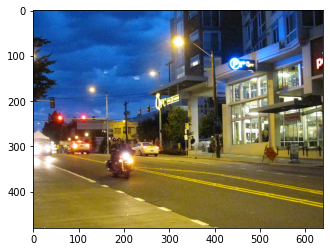

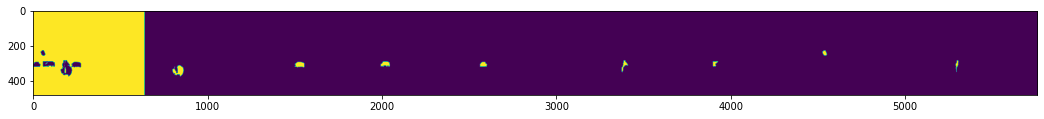

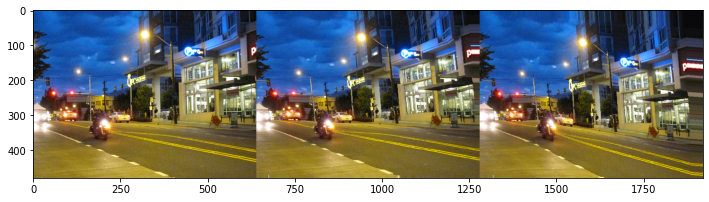

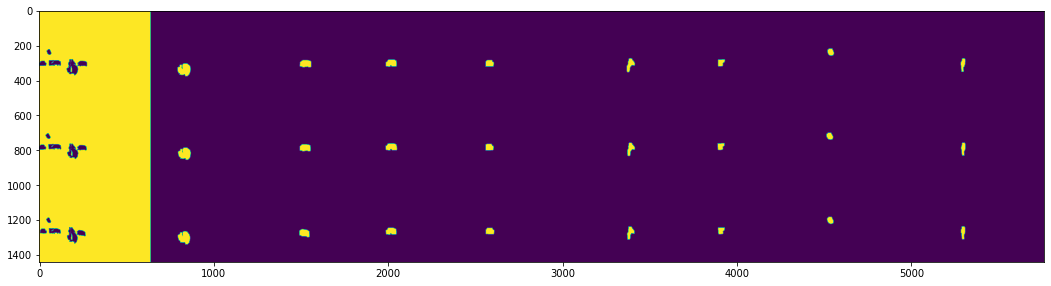

In [7]:
plt.imshow(image.numpy().transpose(1,2,0))
plt.figure(figsize=(18,6))

s_m_image = stack_masks(np.expand_dims(m_image.numpy(), axis=0))[0,0]
plt.imshow(s_m_image)
plt.figure(figsize=(12,6))

s_video = stack_images(video.numpy())[0].transpose(1,2,0)
plt.imshow(s_video)
plt.figure(figsize=(18,6))

s_m_video = stack_masks(m_video.numpy())[0,0]
plt.imshow(s_m_video)